<a href="https://colab.research.google.com/github/masilamani61/ML/blob/main/Customer_subscription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from dateutil import parser

In [297]:
df=pd.read_csv('/content/drive/MyDrive/appdata10.csv')

In [298]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [299]:
df['hour']=df['hour'].str.slice(0,3).astype(int)

In [300]:
df_no_str=df.drop(columns=['user','first_open','screen_list','enrolled_date'])

In [301]:
df['hour']

,hour
0,2
1,1
2,19
3,16
4,18
...,...
49995,13
49996,0
49997,22
49998,12


In [302]:
df_no_str

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
...,...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,1,0
49996,1,0,35,4,0,1,0,0
49997,2,22,39,25,0,0,0,0
49998,6,12,27,26,0,0,1,0


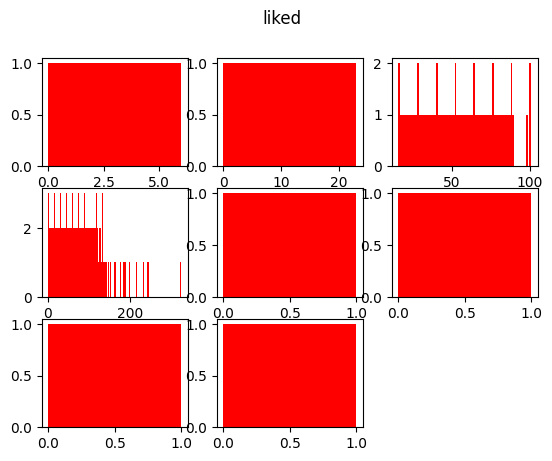

In [303]:
ct=1
for i in df_no_str.columns:
  plt.subplot(3,3,ct)
  f=plt.gca()
  plt.suptitle(i)
  val=len(df_no_str[i].unique())
  plt.hist(df_no_str[i].unique(),bins=val,color='red')
  ct+=1


<Axes: >

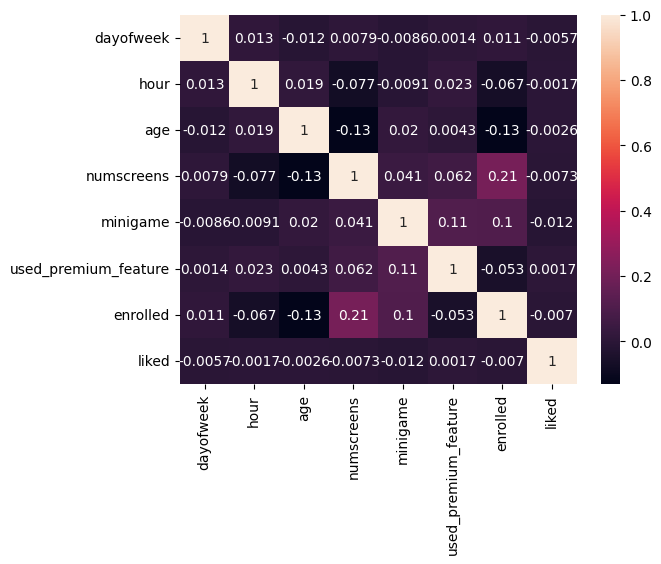

In [304]:
sb.heatmap(df_no_str.corr(),annot=True)

<Axes: >

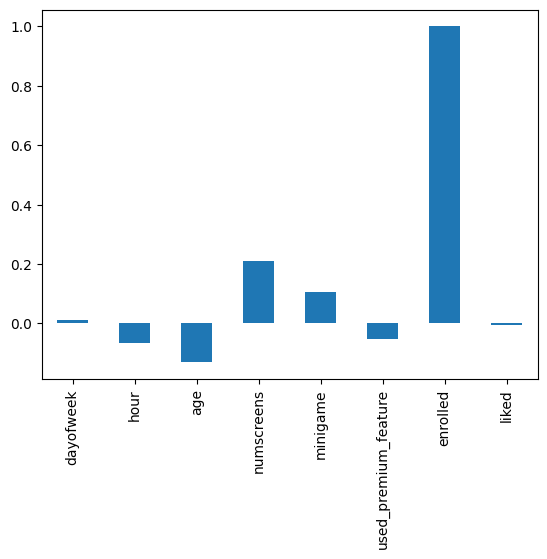

In [305]:
df_no_str.corrwith(df['enrolled']).plot.bar()

In [306]:
df_null=df.dropna()

In [307]:
df_null['enrolled_date']

,enrolled_date
3,2013-07-05 16:11:49.513
4,2013-02-26 18:56:37.841
5,2013-04-03 09:59:03.291
8,2013-04-27 22:24:54.542
9,2013-04-26 18:31:58.923
...,...
49991,2013-02-01 22:35:36.750
49992,2013-02-03 15:43:43.163
49994,2013-02-25 19:36:56.082
49995,2013-05-09 13:47:52.875


In [308]:
df.dtypes

,0
user,int64
first_open,object
dayofweek,int64
hour,int64
age,int64
screen_list,object
numscreens,int64
minigame,int64
used_premium_feature,int64
enrolled,int64


In [309]:
from datetime import datetime

In [310]:
df=df.dropna()

In [311]:
df['enrolled_date']

,enrolled_date
3,2013-07-05 16:11:49.513
4,2013-02-26 18:56:37.841
5,2013-04-03 09:59:03.291
8,2013-04-27 22:24:54.542
9,2013-04-26 18:31:58.923
...,...
49991,2013-02-01 22:35:36.750
49992,2013-02-03 15:43:43.163
49994,2013-02-25 19:36:56.082
49995,2013-05-09 13:47:52.875


In [312]:
from datetime import datetime

In [313]:
df['enrolled_date']=pd.to_datetime(df['enrolled_date'])

<ipython-input-313-2a2967917de1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enrolled_date']=pd.to_datetime(df['enrolled_date'])


In [314]:
df['first_open']=pd.to_datetime(df['first_open'])

<ipython-input-314-8fe47acde12e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_open']=pd.to_datetime(df['first_open'])


In [315]:
df['first_open']

,first_open
3,2013-07-05 16:08:46.354
4,2013-02-26 18:50:48.661
5,2013-04-03 09:58:15.752
8,2013-03-20 14:22:01.569
9,2013-04-26 18:22:16.013
...,...
49991,2013-02-01 22:33:59.502
49992,2013-02-03 15:41:52.059
49994,2013-02-25 19:35:12.691
49995,2013-05-09 13:46:17.871


In [316]:
df['first_open'][3]-df['enrolled_date'][3]

Timedelta('-1 days +23:56:56.841000')

In [317]:
df['duration']=(df['enrolled_date']-df['first_open']).dt.seconds//3600

<ipython-input-317-d67d591e9e4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration']=(df['enrolled_date']-df['first_open']).dt.seconds//3600


(array([21482.,     0.,  1083.,     0.,     0.,   722.,     0.,     0.,
          512.,     0.,     0.,   451.,     0.,     0.,   446.,     0.,
            0.,   406.,     0.,     0.,   350.,     0.,     0.,   342.,
            0.,     0.,   331.,     0.,     0.,   334.,     0.,     0.,
          338.,     0.,   295.,     0.,     0.,   342.,     0.,     0.,
          323.,     0.,     0.,   316.,     0.,     0.,   303.,     0.,
            0.,   303.,     0.,     0.,   336.,     0.,     0.,   336.,
            0.,     0.,   405.,     0.,     0.,   369.,     0.,     0.,
          427.,     0.,   522.]),
 array([ 0.        ,  0.34328358,  0.68656716,  1.02985075,  1.37313433,
         1.71641791,  2.05970149,  2.40298507,  2.74626866,  3.08955224,
         3.43283582,  3.7761194 ,  4.11940299,  4.46268657,  4.80597015,
         5.14925373,  5.49253731,  5.8358209 ,  6.17910448,  6.52238806,
         6.86567164,  7.20895522,  7.55223881,  7.89552239,  8.23880597,
         8.58208955,  8.9

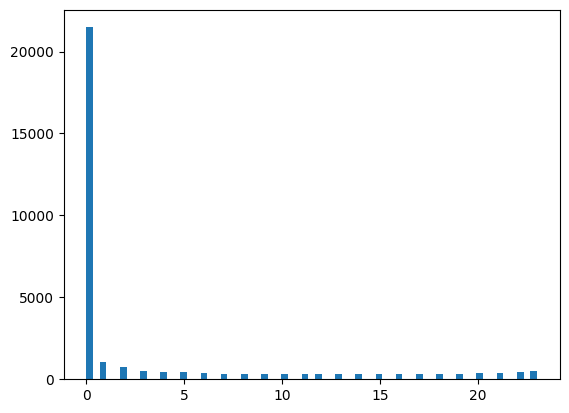

In [318]:
plt.hist(df['duration'],bins=67)

In [319]:
df.loc[df.duration>10 ,'enrolled']=0

In [320]:
df=df.drop(columns=['first_open','enrolled_date','duration'])

In [321]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
5,56480,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,0
8,372004,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,0
9,338013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,0


In [322]:
screen_list= pd.read_csv('/content/drive/MyDrive/top_screens.csv').top_screens

In [323]:
df['screen_list']=df['screen_list'].astype(str)+','

In [324]:
screen_list

,top_screens
0,Loan2
1,location
2,Institutions
3,Credit3Container
4,VerifyPhone
5,BankVerification
6,VerifyDateOfBirth
7,ProfilePage
8,VerifyCountry
9,Cycle


In [325]:
for i in screen_list:
  df[i]=df.screen_list.str.contains(i).astype(int)

In [326]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,372004,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
9,338013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'liked', 'Loan2',
       'location', 'Institutions', 'Credit3Container', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry',
       'Cycle', 'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category',
       'Splash', 'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1',
       'EditProfile', 'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1',
       'Alerts', 'Saving8', 'Saving10', 'Leaderboard', 'Saving4',
       'VerifyMobile', 'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loa

In [328]:
saving_screens=[i  for i in df.columns if 'Saving' in i]

In [329]:
saving_screens

['Saving9',
 'Saving1',
 'Saving8',
 'Saving10',
 'Saving4',
 'Saving7',
 'Saving2',
 'Saving6',
 'Saving2Amount',
 'Saving5']

In [330]:
df['Savings_count']=df[saving_screens].sum(axis =1)

In [331]:
credits_screens=[i for i in df.columns if 'Credit' in i]

In [332]:
credits_screens

['Credit3Container', 'Credit3Dashboard', 'Credit3', 'Credit1', 'Credit2']

In [333]:
df['Creadits_count']=df[credits_screens].sum(axis=1)

In [334]:
loan_screen=[i for i in df.columns if 'Loan' in i]

In [335]:
loan_screen

['Loan2', 'Loan3', 'Loan', 'Loan4']

In [336]:
df['loan_count']=df[loan_screen].sum(axis=1)

In [337]:
df=df.drop(columns=loan_screen+credits_screens+saving_screens+['screen_list'])

<Axes: >

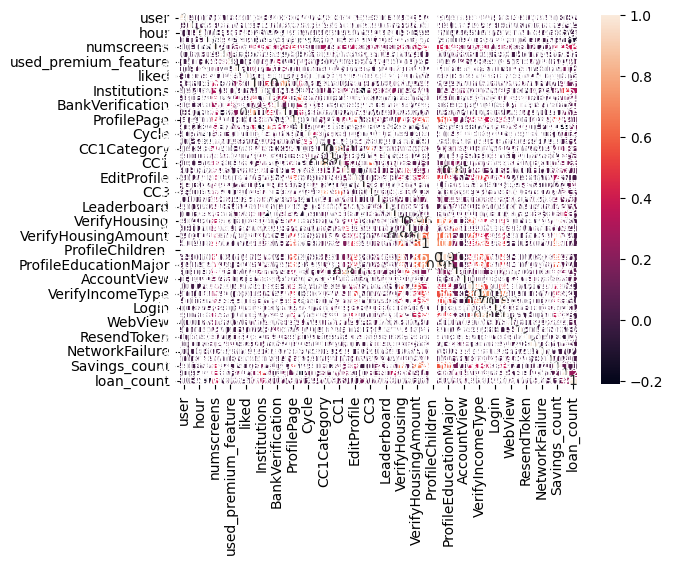

In [338]:
plt.figure(dpi=100)
sb.heatmap(df.corr(),annot=True)


In [339]:
df=df.dropna()

In [340]:
df.enrolled.nunique()

2

In [341]:
df.corr()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Savings_count,Creadits_count,loan_count
user,1.000000,-0.000624,-0.012578,-0.006207,-0.001342,0.003859,0.001659,0.001777,0.011964,0.008206,...,-0.005818,-0.001842,-0.007944,0.006872,-0.002034,-0.001040,0.003332,-0.003865,0.000990,-0.004472
dayofweek,-0.000624,1.000000,0.009654,-0.002621,0.006494,-0.010694,0.003907,-0.004744,-0.009891,-0.004562,...,-0.002955,-0.015145,-0.001150,-0.003929,0.003847,0.001691,0.004916,0.005540,0.004084,0.004736
hour,-0.012578,0.009654,1.000000,0.008929,-0.063279,-0.006225,0.008299,0.041302,-0.004103,-0.059444,...,-0.016005,-0.009485,-0.007987,0.001239,-0.007789,0.005313,0.005020,-0.022759,-0.042777,-0.017873
age,-0.006207,-0.002621,0.008929,1.000000,-0.123325,0.045310,-0.032228,-0.070195,-0.007666,-0.055056,...,-0.007468,0.017472,0.026642,-0.020208,0.014515,0.019555,0.020216,-0.006364,-0.030162,-0.112357
numscreens,-0.001342,0.006494,-0.063279,-0.123325,1.000000,0.006482,0.087563,0.141426,-0.004464,0.372097,...,0.284376,0.184013,0.071843,0.071788,0.105639,0.023632,0.107164,0.402124,0.357806,0.393188
minigame,0.003859,-0.010694,-0.006225,0.045310,0.006482,1.000000,0.128265,-0.095374,-0.009405,-0.067849,...,0.012055,0.015451,-0.015159,-0.014615,0.040153,-0.006466,0.003944,0.016013,0.008381,-0.009455
used_premium_feature,0.001659,0.003907,0.008299,-0.032228,0.087563,0.128265,1.000000,-0.003677,-0.001080,-0.002135,...,0.000692,0.023284,-0.019888,-0.024034,0.089595,-0.006382,-0.001186,0.009709,0.006978,0.064596
enrolled,0.001777,-0.004744,0.041302,-0.070195,0.141426,-0.095374,-0.003677,1.000000,0.001982,0.211254,...,-0.015490,0.014612,0.016662,0.017947,-0.021936,-0.012078,0.009069,-0.017777,0.160126,0.045742
liked,0.011964,-0.009891,-0.004103,-0.007666,-0.004464,-0.009405,-0.001080,0.001982,1.000000,-0.001333,...,-0.001483,-0.001371,0.002330,0.000461,-0.011761,-0.004192,0.000955,-0.011739,0.003525,0.008241
location,0.008206,-0.004562,-0.059444,-0.055056,0.372097,-0.067849,-0.002135,0.211254,-0.001333,1.000000,...,0.027808,0.064595,0.021303,0.062915,0.007701,-0.005417,0.017200,0.014905,0.177142,0.132214


In [342]:
from sklearn.model_selection import train_test_split

In [343]:
X=df.drop(columns=['enrolled'])

In [344]:
y=df['enrolled']

In [345]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [346]:
X_train

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Savings_count,Creadits_count,loan_count
6792,128910,1,10,35,29,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,2
25230,323028,5,19,35,37,0,0,1,1,1,...,0,0,0,0,0,0,0,0,5,2
37171,145495,2,2,23,41,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
26279,279316,3,15,24,25,0,0,0,1,1,...,0,0,0,0,0,0,0,0,5,2
31702,19307,3,14,28,22,0,0,1,1,1,...,0,0,0,0,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47917,225850,2,10,18,31,0,0,1,1,1,...,0,0,0,0,0,0,0,0,2,2
8676,202137,6,20,27,54,0,0,0,1,0,...,1,0,0,0,0,0,0,5,2,2
1362,286087,1,18,48,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25358,56827,5,6,28,14,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [347]:
X_train_user=X_train.user

In [348]:
X_train=X_train.drop('user',axis=1)

In [349]:
X_test_user=X_test.user

In [350]:
X_test=X_test.drop('user',axis=1)

In [351]:
X_train

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Savings_count,Creadits_count,loan_count
6792,1,10,35,29,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,3,2
25230,5,19,35,37,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,5,2
37171,2,2,23,41,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,2
26279,3,15,24,25,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,5,2
31702,3,14,28,22,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47917,2,10,18,31,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,2,2
8676,6,20,27,54,0,0,0,1,0,1,...,1,0,0,0,0,0,0,5,2,2
1362,1,18,48,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25358,5,6,28,14,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [352]:
from sklearn.preprocessing import StandardScaler

In [353]:
Std_sc=StandardScaler()

In [354]:
X_train=Std_sc.fit_transform(X_train)

In [355]:
X_test=Std_sc.transform(X_test)

In [356]:
from sklearn.linear_model import   LogisticRegression

In [357]:
LR_model=LogisticRegression(penalty='l2')

In [358]:
LR_model.fit(X_train,y_train)

LogisticRegression()

In [359]:
from sklearn.svm import SVC
svc_model=SVC(C=10)

In [360]:
svc_model.fit(X_train,y_train)

SVC(C=10)

In [361]:
df['enrolled'].sum(),df['enrolled'].count()

(26459, 31074)

In [362]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [363]:
print(classification_report(y_train,LR_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.46      0.06      0.11      3699
           1       0.86      0.99      0.92     21160

    accuracy                           0.85     24859
   macro avg       0.66      0.52      0.51     24859
weighted avg       0.80      0.85      0.80     24859



In [364]:
print(classification_report(y_test,svc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.34      0.06      0.10       916
           1       0.86      0.98      0.91      5299

    accuracy                           0.84      6215
   macro avg       0.60      0.52      0.51      6215
weighted avg       0.78      0.84      0.79      6215



<Axes: >

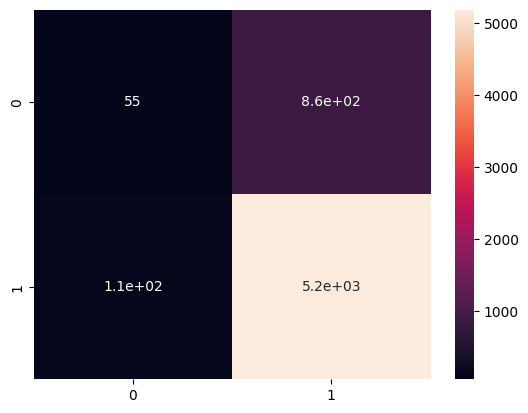

In [365]:
sb.heatmap(confusion_matrix(y_test,svc_model.predict(X_test)),annot=True)

In [366]:
accuracy_score(y_test,svc_model.predict(X_test))

0.8442477876106195

In [367]:
accuracy_score(y_test,LR_model.predict(X_test))

0.8521319388576025